In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X0 = wine_quality.data.features 
y0 = wine_quality.data.targets 

# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [2]:
# print(X.head())
# print("--------------------")
# print(y.head())
# print(y.shape)
X = X0.values
print(X.shape)
y = y0.values

(6497, 11)


正規化

In [3]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#標準化
scaler = preprocessing.StandardScaler()
#print(X)
scaler.fit(X)
s_x = scaler.transform(X) 
#print(s_x)
scaler.fit(y)
s_y = scaler.transform(y)

X_train, X_test, y_train, y_test = train_test_split(s_x, s_y, test_size=0.2, random_state=1)

線形回帰

重み計算$$W＝(X^{T}X)^{-1}X^{T}y$$
$$X=(x_{0},...,x_{N})^{T}$$

In [4]:
def linear_regression(X0, y):
    n_points = len(X0)
    X = np.concatenate([np.ones((n_points, 1)), X0], axis=1)
    #Xは[観測数,特徴量]の形だから、X.Tは[特徴量,観測数]の形になる
    W = np.linalg.inv(X.T @ X) @ X.T @ y
    return W

In [5]:
# 重み計算
W = linear_regression(X_train, y_train)
# 予測
# ここは転置する必要がある
pred_y = W.T @ np.concatenate([np.ones((len(X_test), 1)), X_test], axis=1).T
pred_y = pred_y.T

#　誤差
print(mean_squared_error(y_test, pred_y))

#　元に戻す
r_pred = scaler.inverse_transform(pred_y)
r_test = scaler.inverse_transform(y_test)

print(mean_squared_error(r_test, r_pred))

0.6930730281836501
0.5284386562300206


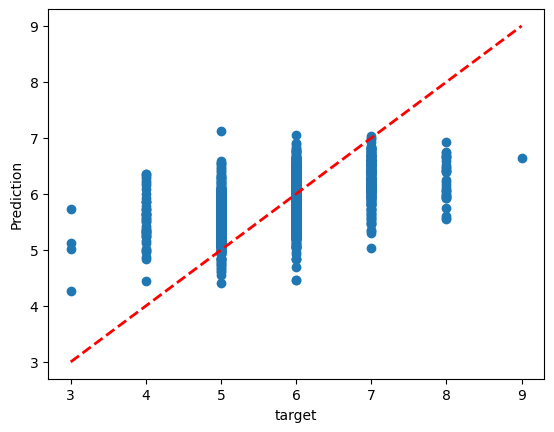

In [6]:
import matplotlib.pyplot as plt
#グラフ表示
plt.scatter(r_test, r_pred) #散布図
plt.xlabel('target')
plt.ylabel('Prediction')

# y=x の補助線を追加
max_val = 9
min_val = 3
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.show()